In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [5]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
linear_prediction = tf.matmul(x, W) + b
scaled_prediction = tf.nn.softmax(linear_prediction) # Softmax
loss_function = tf.losses.softmax_cross_entropy(y, linear_prediction)

In [9]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [12]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

In [11]:
training_iteration = 30
batch_size = 100
batch_count = int(mnist.train.num_examples/batch_size)

for iteration in range(training_iteration):
    for i in range(batch_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    if iteration % 5 == 0:
        loss = loss_function.eval({x: mnist.test.images, y: mnist.test.labels})
        print ("Iteration:", '{}'.format(iteration), "cost=", "{:.9f}".format(loss))
print ("Tuning completed!")

Iteration: 1 cost= 0.743599474
Iteration: 3 cost= 0.494251847
Iteration: 5 cost= 0.427804738
Iteration: 7 cost= 0.394568861
Iteration: 9 cost= 0.374085575
Iteration: 11 cost= 0.359885186
Iteration: 13 cost= 0.349166662
Iteration: 15 cost= 0.340891242
Iteration: 17 cost= 0.334062874
Iteration: 19 cost= 0.328272730
Iteration: 21 cost= 0.323961467
Iteration: 23 cost= 0.319906920
Iteration: 25 cost= 0.316299796
Iteration: 27 cost= 0.312982619
Iteration: 29 cost= 0.310380399
Tuning completed!


In [17]:
predicted_label = tf.argmax(scaled_prediction, 1)
actual_label = tf.argmax(y, 1)
is_equal_labels = tf.equal(actual_label, predicted_label)
accuracy = tf.reduce_mean(tf.cast(is_equal_labels, "float"))

In [20]:
accracy_value = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
print ("Accuracy:", accracy_value)

Accuracy: 0.916


In [21]:
predicted_test_values = predicted_label.eval({x: mnist.test.images})

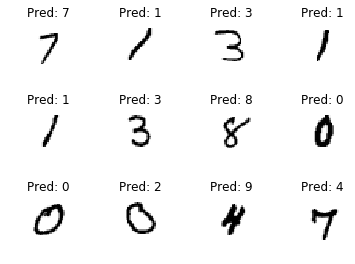

In [23]:
vizualize_data(mnist.test.images, 
               predicted_test_values,
               label_name="Pred")